In [5]:
import os
import glob
import cv
import tensorflow as tf
import matplotlib.pyplot as plt
import glob
from PIL import Image

#Load Kaggle Dataset
classes = ['mask', 'no_mask']

In [6]:
def load_img_dir(path, label):
    image_list=[]
    for filename in glob.glob(path+'/*.png'):
        img = tf.io.read_file(filename)
        img = tf.image.decode_image(img, channels=3)
        img.set_shape([None,None,3])
        img = tf.image.resize(img, [64, 64])
        img = img/127.5-1
        image_list.append((img, label))
    return image_list

training_mask = load_img_dir('../kaggle_12k/Train/WithMask', classes[0])
training_no_mask = load_img_dir('../kaggle_12k/Train/WithoutMask', classes[1])
validation_mask = load_img_dir('../kaggle_12k/Validation/WithMask', classes[0])
validation_no_mask = load_img_dir('../kaggle_12k/Validation/WithoutMask', classes[1]) 
test_mask = load_img_dir('../kaggle_12k/Test/WithMask', classes[0])
test_no_mask = load_img_dir('../kaggle_12k/Test/WithoutMask', classes[1])
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


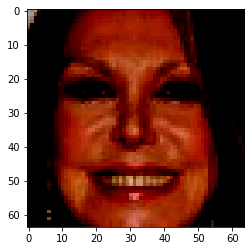

In [3]:
#From Tanya
def data_generator(features,labels):
  dataset = tf.data.Dataset.from_tensor_slices((features,labels))
  dataset = dataset.shuffle(buffer_size=100)
  autotune = tf.data.experimental.AUTOTUNE
  dataset = dataset.map(load_data, num_parallel_calls=autotune)
  dataset = dataset.batch(batch_size=batch_size)
  dataset = dataset.repeat()
  dataset = dataset.prefetch(autotune)
  return dataset
